In [140]:
# Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

#Read data from loan file
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

#Remove NA from the numberic column
df = df.dropna(axis=1)
print(df['annual_inc'])

Pandas version: 2.0.3
NumPy version: 1.24.4
Matplotlib version: 3.7.4
Seaborn version: 0.13.1
0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64


In [69]:
# Identify the number of loans issued by a bank for each customer in this period (2007 to 2011) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

grp_loans_by_member = df['member_id'].value_counts()

more_loans_taken = grp_loans_by_member[grp_loans_by_member >1]
print(more_loans_taken) # This gives the NO customer has taken more than 1 time the loan

Series([], Name: count, dtype: int64)


In [124]:
#Take the sample number of customers for each category for testing
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

# Taking the sample
fd_c = df.loc[df['loan_status'] =='Current', ['member_id','loan_status']].head(5)
fd_ch = df.loc[df['loan_status'] =='Charged Off', ['member_id','loan_status']].head(5)
fd_fp = df.loc[df['loan_status'] =='Fully Paid', ['member_id','loan_status']].head(5)

print(fd_c)
print(fd_ch)
print(fd_fp)

Series([], Name: count, dtype: int64)
    member_id loan_status
4     1311748     Current
32    1299514     Current
39    1304237     Current
86    1297940     Current
95    1303001     Current
    member_id  loan_status
1     1314167  Charged Off
8     1306957  Charged Off
9     1306721  Charged Off
12    1298717  Charged Off
14    1303503  Charged Off
   member_id loan_status
0    1296599  Fully Paid
2    1313524  Fully Paid
3    1277178  Fully Paid
5    1311441  Fully Paid
6    1304742  Fully Paid


In [134]:
#Identify the customer loan status of a particular customer 
import pandas as pd
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)
# 91306721 - Charged Off ; 1296599 - Fully paid; 920821 - Current ; 

p_member_id = 920821 
df = df[df['member_id']==p_member_id]
print(df)

def analysis_charged_off():
    return(df[['tot_cur_bal','tot_coll_amt','chargeoff_within_12_mths']])
def analysis_Current():
    return(df[['tot_cur_bal','tot_coll_amt','chargeoff_within_12_mths','delinq_amnt','inq_last_12m']])    
def analysis_Fully_paid():
    return(df[['tot_cur_bal','tot_coll_amt']])    

if df['loan_status'].iloc[0]=='Charged Off':
    review = analysis_charged_off()
elif df['loan_status'].iloc[0]=='Current':
    review = analysis_Current()    
    print('analysis_charged_off')
elif df['loan_status'].iloc[0]=='Fully paid':
    review = analysis_Fully_paid()    
    print('analysis_charged_off')
else:
    review = 'Others'
    print('Others')
    
print(df.loc[df['member_id'] ==p_member_id, ['loan_status']])
print(review)

           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
15972  725556     920821      10400        10400          10400.0   60 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
15972    6.00%       218.99     E        E3  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
15972                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
15972                  0.0       0.0             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
15972            NaN                        NaN  

[1 rows x 111 columns]
analysis_charged_off
      loan_status
15972     Current
       tot_cur_bal  tot_coll_amt  chargeoff_within_12_mths  delinq_amnt  \
15972          NaN           NaN                       0.0            0   

       inq_last_12m  
15972           NaN  


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
      emp_length  annual_inc
25762     1 year   1200000.0
33432     1 year   1200000.0
34531     1 year    720000.0
1808      1 year    550000.0
32391     1 year    510000.0
...          ...         ...
20772        NaN      8088.0
4212         NaN      8000.0
6631         NaN      7200.0
29567        NaN      4800.0
30726        NaN      4200.0

[39717 rows x 2 columns]
            annual_inc
emp_length            
1 year            3240
10+ years         8879
2 years           4388
3 years           4095
4 years           3436
5 years           3282
6 years           2229
7

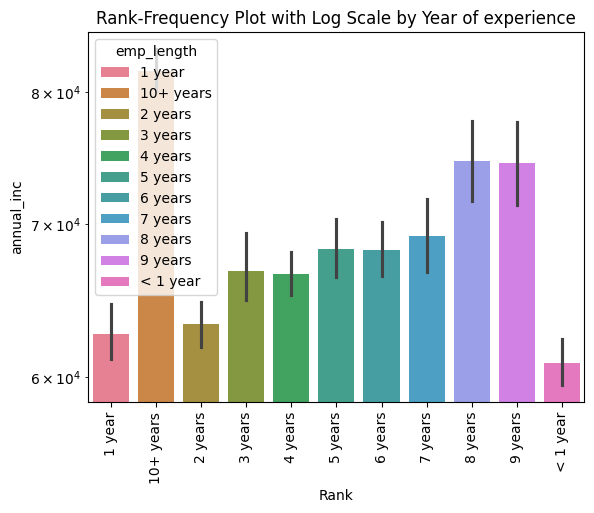

<Figure size 1200x600 with 0 Axes>

In [4]:
#Unordered Variables – Rank frequency Plots with log scale
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

print(df.columns)
df=df[['emp_length','annual_inc']]

df_sorted = df.sort_values(by=['emp_length','annual_inc'], ascending=[True, False])
print(df_sorted)
grp_data = df.groupby("emp_length").count()
print(grp_data)

df_ranked = df_sorted.reset_index(drop=True).assign(rank=df_sorted.groupby(['emp_length']).cumcount() + 1)

fig, ax = plt.subplots()
sns.barplot(x="emp_length", y='annual_inc', hue='emp_length', data=df_ranked, ax=ax)
ax.set_xlabel('Rank')
ax.set_ylabel('annual_inc')
ax.set_title('Rank-Frequency Plot with Log Scale by Year of experience')
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.figure(figsize=(12, 6))
plt.show()

9    Charged Off
Name: loan_status, dtype: object


Empty DataFrame
Columns: [member_id, group_count]
Index: []


In [10]:
# chargeoff_within_12_mths 
import pandas as pd
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

filtered_df = df.loc[(df['chargeoff_within_12_mths'] >0),['id']]
print(filtered_df.count())

id    0
dtype: int64


  home_ownership  group_count
0       MORTGAGE        17659
1           NONE            3
2          OTHER           98
3            OWN         3058
4           RENT        18899


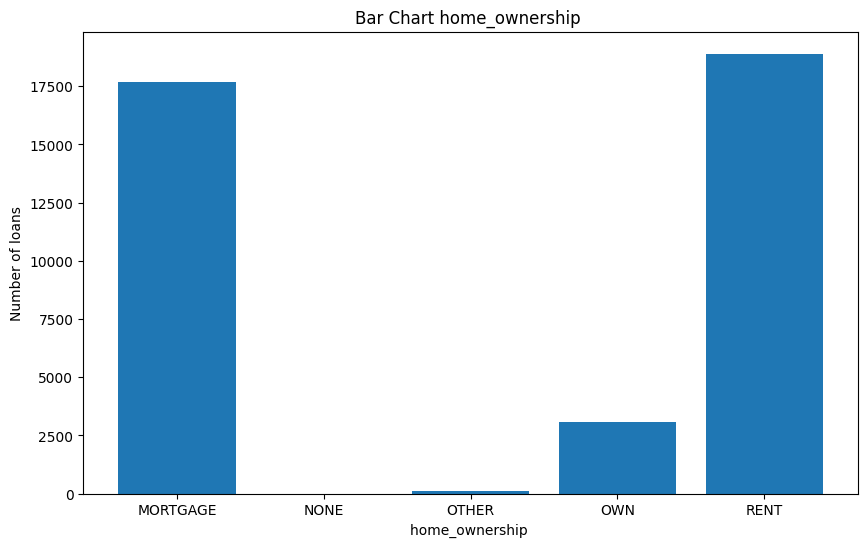

In [14]:
# Home owners categorize - Risk factors
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

filtered_df = df.groupby('home_ownership')['home_ownership'].size().to_frame('count')
filtered_df.reset_index(inplace=True)
filtered_df.rename(columns={'count': 'group_count'}, inplace=True)
print(filtered_df)
x = filtered_df['home_ownership']
y = filtered_df['group_count']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_title('Bar Chart Home Ownership ')
ax.set_xlabel('home_ownership ')
ax.set_ylabel('Number of loans')
plt.show()

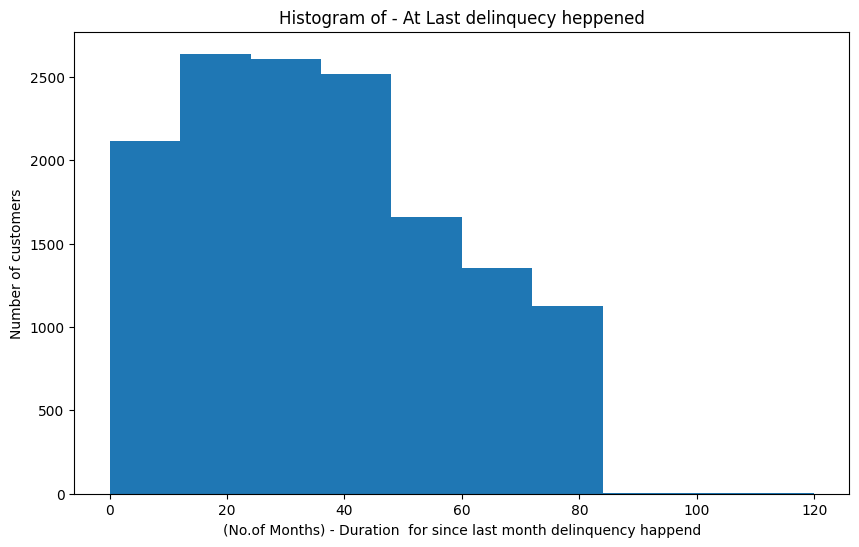

In [20]:
# Histogram for mths_since_last_delinq - Months since last delinquency
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)
num_bins = 5

plt.figure(figsize=(10, 6))
plt.hist(df['mths_since_last_delinq'], bins=10)
plt.title('Histogram of - At Last delinquecy heppened')
plt.xlabel('(No.of Months) - Duration  for since last month delinquency happend')
plt.ylabel('Number of customers')

plt.show() # shows the 0-20 has maximum frequency

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64
Interquartile Range (IQR): 47.00000000000001


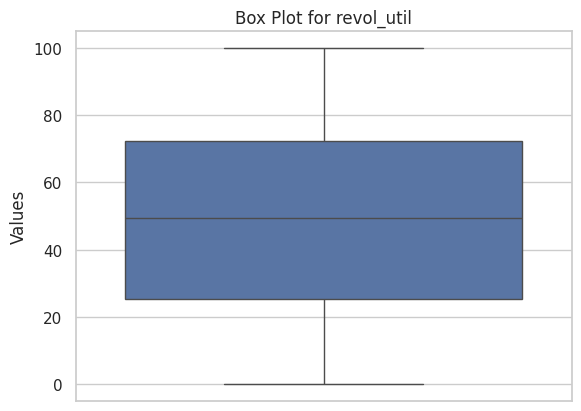

In [16]:
# Box plot for Revolution utilization%
import pandas as pd
import seaborn as sns

pf = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

column_name = 'revol_util'

df[column_name] = pf[column_name].str.rstrip('%').astype(float) / 100.0 * 100
print(df[column_name])

sns.set(style="whitegrid")
ax = sns.boxplot(y=df[column_name])

ax.set_title(f'Box Plot for {column_name}')
ax.set_ylabel('Values')

# Calculate and print Interquartile Range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

plt.show()

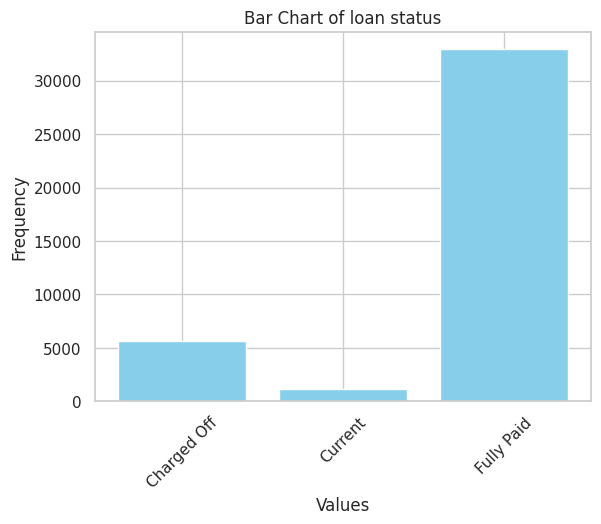

In [32]:
#  Bar chart based on loan status
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False)

column_name = 'loan_status'

loan_status = df[column_name].value_counts()

loan_status.sort_index(inplace=True)

plt.bar(loan_status.index, loan_status.values, color='skyblue')


plt.title(f'Bar Chart of loan status')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.show()

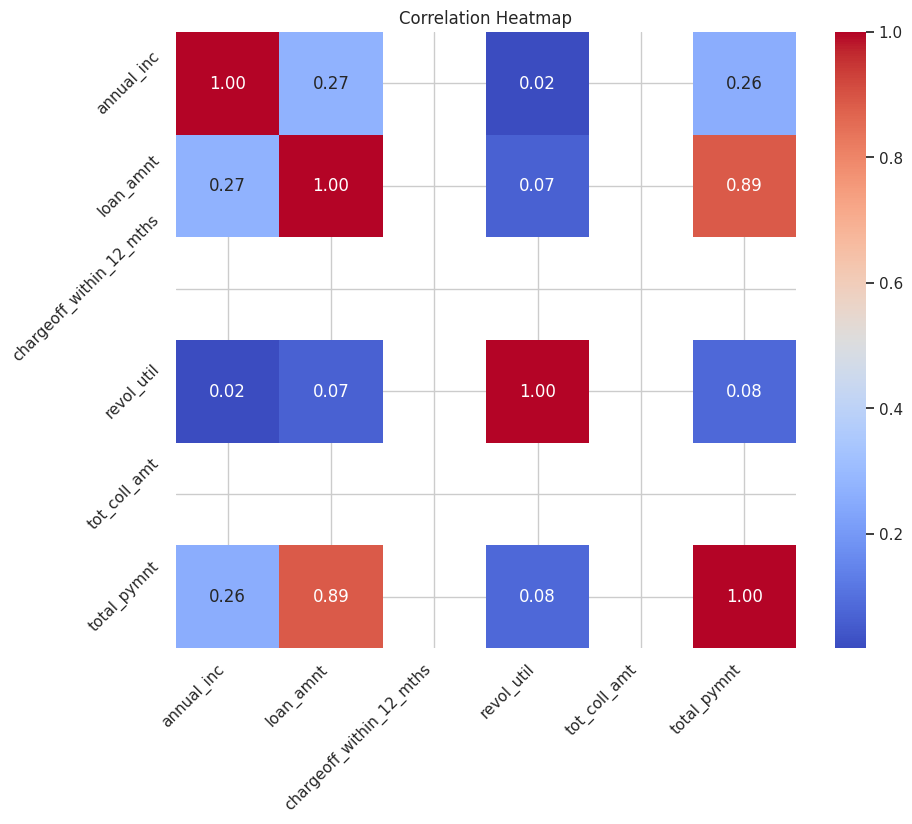

In [44]:
# Bivariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/loan_case_study/loan.csv',low_memory=False
                 
#  correlation matrix for the below columns
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float) / 100.0
correlation_matrix = df[['annual_inc', 'loan_amnt', 'chargeoff_within_12_mths', 'revol_util','tot_coll_amt','total_pymnt']].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 45 rotate for proper label display
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('Correlation Heatmap')
plt.show()